# DISCLAIMER GIGANTE: SOLAMENTE PARA SACAR LOS GET_DUMMIES MI COMPUTADORA TARDÓ CASI 1 HORA. NO VOY A CORRER LA FUNCIÓN QUE CREE PARA OBTENER LOS RESULTADOS DE MIS MODELOS POR MI PROPIA SEGURIDAD PERO CONFIO EN QUE TODO ESTÁ FUNCIONANDO COMO SE SUPONE QUE DEBE FUNCIONAR.

# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
#Func definitions

def label(element):
    if element < 10:
        return 'num'
    elif element < 36:
        return 'upp'
    else:
        return 'low'
    
def model(x, y_model):
    
    models = [LogisticRegression(), DecisionTreeClassifier(max_depth=5), GaussianNB(), \
              RandomForestClassifier(n_estimators=100,max_depth=4, random_state=0), \
              OneVsOneClassifier(LinearSVC(random_state=0, max_iter=4000)), KNeighborsClassifier(n_neighbors=4)]

    name = ['LogisticRegression', 'DecisionTreeClassifier', 'GaussianNB', \
                   'RandomForestClassifier', 'SVM', 'KNeighborsClassifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y_model, test_size = 0.2)
    for i, model in enumerate(models):
        md = model
        md.fit(x_train, y_train)
        y_pred = md.predict(x_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        print(f'Model {name[i]} results:')
        print(f'Accuracy score: {accuracy}')
        print('Confusion_matrix_:\n')
        print(confusion_matrix(y_test, y_pred))


In [10]:
# Your code here
data = pd.read_csv('data_all.csv')
data.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
data.shape

(116322, 785)

In [64]:
#Ok, me tardé en entender que está pasando, pero lo que ocurrió es que la columna e tiene el caracter que representa en formato
#unicode por lo que si queremos saber exctamente a que caracter se refiere hay que hacer un cast:

labels = data['e'].value_counts().index.to_list()
labels = sorted(labels)
#Los valores de la columna e van desde 0 a 61

#for i in range(0,10):
#    print(i)

#for i in range(10,36):
#    print(chr(int(i - 10 + 65)))
    
#for i in range(36,62):
#    print(chr(int(i +61)))

#Haciendo esos prints pude demostrar que los labes quedan así
#0-9 representan: 0-9
#10-35 representan: A-Z
#36-61 representan: a-z

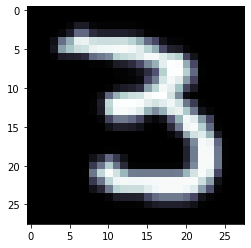

In [81]:
#Como ultima prueba de que esto es verdad. En la fila numero 2 el valor de 'e' es 3, y 
#cuando ploteamos vemos que efectivamente es un 3: 
fig, ax = plt.subplots()
ax.imshow(np.array(data.iloc[2,1:]).reshape(28, 28), cmap=plt.cm.bone)

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

* Try to do the same thing with lowercases.

* Try to do the same thing with numbers.

In [ ]:
# Ahora voy a hacer un apply con la funcion que cree para hacer una columna con el tipo de Dato y despues 
#le voy a aplicar un get_dummies para obtener 3 columnas diferentes que voy a utilizar como y_test, y_train
data['Type'] = data['e'].apply(label)
data_dum = pd.concat([data, pd.get_dummies(data)], axis = 1).drop('e', axis = 1)
data_dum

#Obtengo la x y la ys que voy a necesitar para mis modelos:

x = data_dum.drop(['Type','Type_low', 'Type_num','Type_upp'], axis = 1)
y_upper = data_dummies['Type_upp']
y_lower = data_dummies['Type_low']
y_number = data_dummies['Type_num']

#Como utilicé los mismos modelos para los tres casos, prefiero usar una función que haga todos los calculos repetitivos
#Y solo variar los parametros

model(x, y_upper)
model(x, y_lower)
model(x, y_number)


